In [1]:
import numpy as np
import pandas as pd

import yfinance as yf


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = "GC=F"#input("enter the code of the stock:- ") # like BTC=F for bitcoin and you get this code from yahoo finance website
df = yf.download(stocks , "2008-01-01","2025-08-01" ,auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2008-01-02,857.000000,857.799988,846.400024,848.700012,130
2008-01-03,866.400024,865.500000,856.299988,863.000000,181
2008-01-04,863.099976,865.500000,860.200012,861.400024,28
2008-01-07,859.599976,860.900024,857.400024,860.900024,4
2008-01-08,878.000000,879.400024,861.599976,861.599976,21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4422 entries, 2008-01-02 to 2025-07-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GC=F)   4422 non-null   float64
 1   (High, GC=F)    4422 non-null   float64
 2   (Low, GC=F)     4422 non-null   float64
 3   (Open, GC=F)    4422 non-null   float64
 4   (Volume, GC=F)  4422 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 207.3 KB


In [4]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
count,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000
mean,1525.802645,1533.947468,1517.392515,1525.848259,5295.183175
std,483.402334,485.810776,480.625066,483.030953,27961.360267
min,704.900024,715.500000,681.000000,705.000000,0.000000
25%,1222.049988,1225.925018,1215.400024,1222.249969,47.000000
50%,1360.000000,1365.900024,1349.849976,1357.900024,163.000000
75%,1781.775024,1791.400024,1774.275024,1782.000000,542.000000
max,3439.199951,3485.600098,3407.300049,3442.000000,386334.000000


Text(0.5, 1.0, 'bitcoin value')

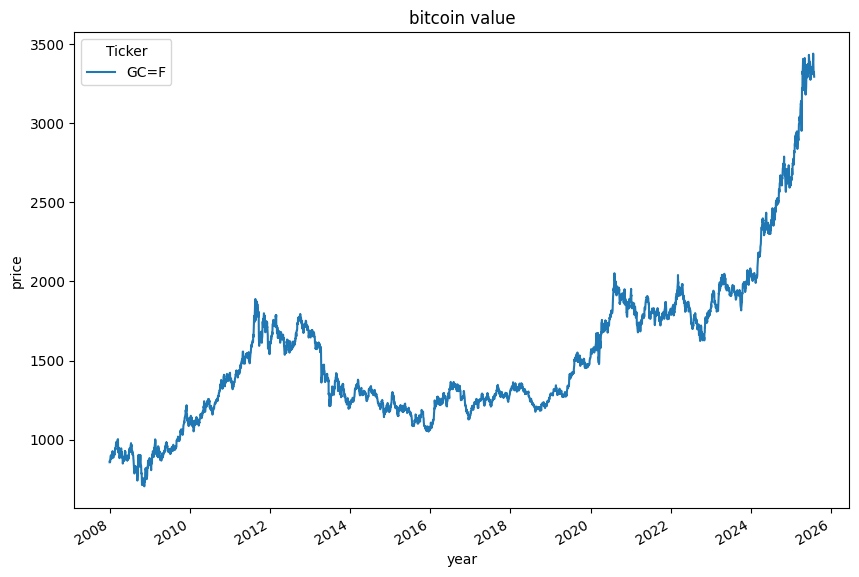

In [5]:
df.Close.plot(figsize=(10,7))
plt.ylabel("price")
plt.xlabel("year")
plt.title("bitcoin value")

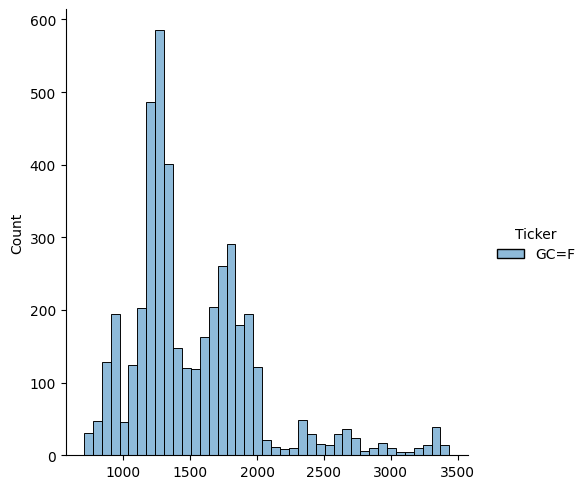

In [6]:
sns.displot(df["Close"])

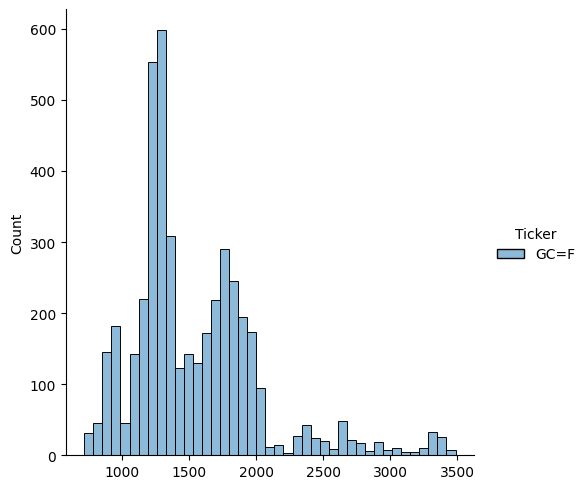

In [7]:
sns.displot(df['High'])

In [8]:
#first we make Close feature as target value and other as input feature


x = df.drop(columns=['Close'] ,axis=1)
y = df['Close']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression

In [10]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=13)

In [11]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

In [12]:
print("r2_score:",r2_score( y_test,lr_pred))
print("mean_squared_error:",np.sqrt(mean_squared_error(y_test,lr_pred)))

r2_score: 0.9998587064307722
mean_squared_error: 6.003855074345619


In [13]:
# using Regularization method like lasso , ridge
from sklearn.linear_model import Lasso , Ridge

l2 = Ridge().fit(x_train,y_train)
l1 = Lasso().fit(x_train,y_train)


l2_pred = l2.predict(x_test)
l1_pred = l1.predict(x_test)

print("r2_score for ridge:",r2_score( y_test,l1_pred))
print("mean_squared_error:",np.sqrt(mean_squared_error(y_test,l1_pred)))
print("r2_score for lasso:",r2_score( y_test,l2_pred))
print("mean_squared_error:",np.sqrt(mean_squared_error(y_test,l2_pred)))

r2_score for ridge: 0.9997601313896685
mean_squared_error: 7.82268264490394
r2_score for lasso: 0.99985870666296
mean_squared_error: 6.003850141277032


/home/tushar/anaconda3/envs/tf-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+05, tolerance: 8.072e+04
  model = cd_fast.enet_coordinate_descent(


In [14]:
# using support vectore machine alogorithm  this is taking vary much time

# from sklearn.svm import SVR

# svr_model = SVR(kernel="linear").fit(x_train,y_train)

In [15]:
from sklearn.svm import SVR 
from sklearn.model_selection import  GridSearchCV

svr = SVR()


peram_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}
grid = GridSearchCV(svr,peram_grid,refit=True,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/home/tushar/anaconda3/envs/tf-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tushar/anaconda3/envs/tf-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tushar/anaconda3/envs/tf-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tushar/anaconda3/envs/tf-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y 

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [18]:
svr = SVR(C=10 , gamma = 0.01,kernel = 'rbf')
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)

print("r2_score for SVM:",r2_score( y_test,svr_pred))
print("mean_squared_error:",np.sqrt(mean_squared_error(y_test,svr_pred)))

/home/tushar/anaconda3/envs/tf-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score for SVM: -0.06813515486065835
mean_squared_error: 522.0139474114131


In [17]:
import joblib
joblib.dump(svr, "model.pkl")

model = joblib.load("model.pkl")